In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import numpy as np,matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
data = pd.DataFrame(boston.data,columns = boston.feature_names)
data['target']= boston.target

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [6]:
scaler = StandardScaler()
scaler.fit(data.drop('target',axis=1))
scaled_features = scaler.transform(data.drop('target',axis=1))

In [7]:
trans = PolynomialFeatures(degree=1)
data_new= trans.fit_transform(scaled_features)
data_new_df = pd.DataFrame(data_new,columns= ["bias","CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
data_new_df.head()

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,1.0,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,1.0,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,1.0,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,1.0,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_new_df,data['target'],test_size=0.2,train_size=0.8)
# x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)
# x_train, x_test, y_train, y_test = train_test_split(data,data['target'],test_size=0.2,train_size=0.8)

In [9]:
def evaluate_model(x,lambdas):
    training_errors = []
    testing_errors = []
   
    
   
    for l in lambdas:
        model = Ridge(alpha=l, max_iter=10000)
        model.fit(x, y_train)
        
        training_predictions = model.predict(x)
        training_mse = mean_squared_error(y_train, training_predictions)
        training_errors.append(training_mse)
        
        
        
        #testing_predictions = model.predict(x_cv)
        testing_mse =  (-1*cross_val_score(model,x_train,y_train,scoring = 'neg_mean_squared_error', cv=4)).mean()
        testing_errors.append(testing_mse)
        
      
        
    return training_errors, testing_errors 

In [10]:
def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, test_errors, label="cv")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="cv")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

In [11]:
def hypothesis (j):
    x_new = pd.DataFrame()
    for k in range (14):
        feature_name = feature_name_list[k] 
        x_new.insert(k, feature_name, np.power(x_train.iloc[:,k],j[k]), True)
    return x_new

In [12]:
feature_name_list = ["bias","CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]

    

j = [0,1,1,1,1,1,1,1,1,1,1,1,1,1]
x = hypothesis(j)




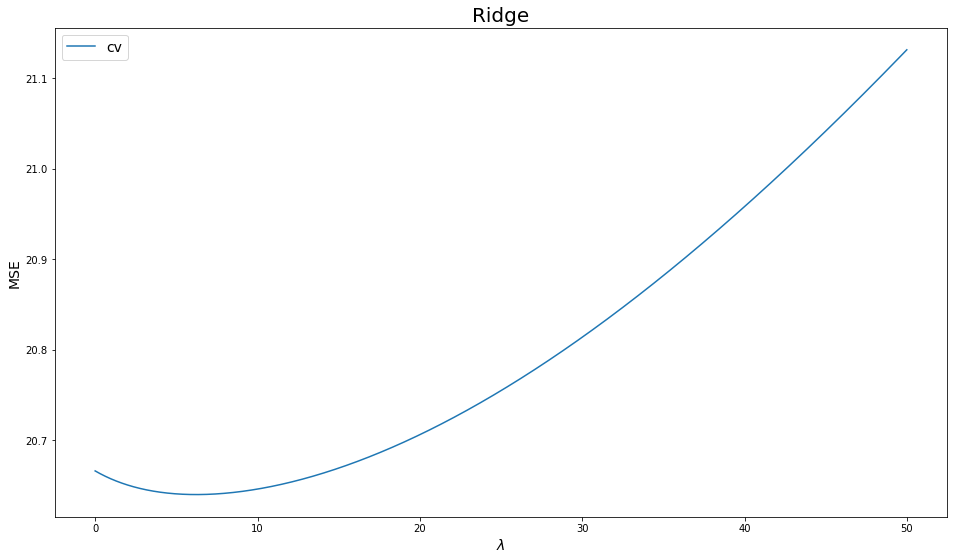

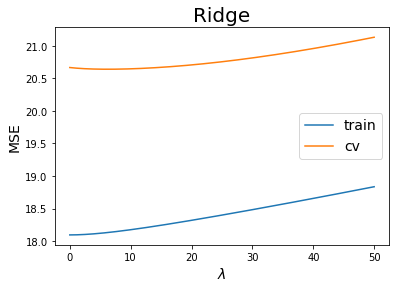

In [14]:

lambdas= np.arange(0, 50, step=0.01)
ridge_train, ridge_test = evaluate_model(x, lambdas)
plot_errors(lambdas, ridge_train, ridge_test, "Ridge")


In [27]:

model = Ridge(alpha=10, max_iter=10000)
model.fit(x, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
        

In [16]:
mse

41.174979227649146

In [17]:
r2 = model.score(x_test, y_test)

In [18]:
r2

0.5444212021880979

In [29]:
lambda_values = [0.00001, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 3, 5, 6, 7, 8, 9, 10]

for lambda_val in lambda_values:
    ridge_reg = Ridge(lambda_val)
    ridge_reg.fit(x_train, y_train)
    y_pred = ridge_reg.predict(x_test)
    mse_ridge = mean_squared_error(y_pred, y_test)
    print(("Ridge MSE with Lambda={} is {}").format(lambda_val, mse_ridge))

Ridge MSE with Lambda=1e-05 is 40.52584056259564
Ridge MSE with Lambda=0.01 is 40.52653925775547
Ridge MSE with Lambda=0.05 is 40.52933633245786
Ridge MSE with Lambda=0.1 is 40.53283151993242
Ridge MSE with Lambda=0.5 is 40.56074249970429
Ridge MSE with Lambda=1 is 40.59548578063916
Ridge MSE with Lambda=1.5 is 40.63003967151857
Ridge MSE with Lambda=3 is 40.732331752240576
Ridge MSE with Lambda=5 is 40.864938559524525
Ridge MSE with Lambda=6 is 40.9294495233654
Ridge MSE with Lambda=7 is 40.99271577321153
Ridge MSE with Lambda=8 is 41.054724162478145
Ridge MSE with Lambda=9 is 41.11547512813045
Ridge MSE with Lambda=10 is 41.17497922764901


In [30]:
print(ridge_reg.coef_)

[ 0.         -0.69714678  0.80681991 -0.109725    0.72941416 -1.33700343
  3.63806879 -0.29998862 -2.3607667   1.55766945 -1.66746805 -1.66013756
  0.910367   -2.72797718]


In [ ]:
lambda_values = [0.000001, 0.0001, 0.001, 0.005, 0.01, 0.05,  0.1, 0.2, 0.3, 0.4, 0.5]

for lambda_val in lambda_values:
    lasso_reg = Lasso(lambda_val)
    lasso_reg.fit(x_train, y_train)

    y_pred = lasso_reg.predict(x_test)
    mse_lasso = mean_squared_error(y_pred, y_test)
    print(("Lasso MSE with Lambda={} is {}").format(lambda_val, mse_lasso))



Lasso MSE with Lambda=1e-06 is 40.52585684125307
Lasso MSE with Lambda=0.0001 is 40.52753824971947
Lasso MSE with Lambda=0.001 is 40.5426137396116
Lasso MSE with Lambda=0.005 is 40.612137625538466
Lasso MSE with Lambda=0.01 is 40.704508433703204
Lasso MSE with Lambda=0.05 is 41.47703277553143
Lasso MSE with Lambda=0.1 is 42.73673737195214
Lasso MSE with Lambda=0.2 is 44.91033120077674
Lasso MSE with Lambda=0.3 is 46.33943818891401
Lasso MSE with Lambda=0.4 is 47.692053200679986
Lasso MSE with Lambda=0.5 is 47.87865337540901


In [26]:
    print(lasso_reg.coef_) #zeros the useless values and valid for less no of features

[ 0.         -0.          0.         -0.          0.39964813 -0.
  3.77273834 -0.         -0.         -0.         -0.46658933 -1.3988097
  0.61052287 -2.83480083]
